## Parametric Uncertainty

This notebook is an example of the parametric uncertainty functions in pc-gym. The systems in pc-gym are described as discrete dynamical systems: 
\begin{equation}
  x_{t+1} = f(x_t, u_t)
\end{equation}
These systems can be parameterized by a set of parameters $\theta \in \Theta$. The uncertainty in the parameters can be modeled as a probability distribution over the parameter space $\Theta$. The parametric uncertainty functions in pc-gym allow the user to specify the distribution of the parameters and sample from it. Creating a system: 
$$
  x_{t+1} = f(x_t, u_t, \theta)\\
  \text{where}\quad \theta \sim p(\theta)
$$


In [1]:
import numpy as np
from pcgym import make_env
import matplotlib.pyplot as plt

To implement the parametric uncertainty in PC-Gym we add a dictionary called uncertainty which describes the distribution of the parameters to the environment parameters.

In [6]:
env_params = {
    "model": "photo_production",
    "x0": np.array([0.1, 20.0, 0.0]),  # Initial conditions for [c_x, c_N, c_q]
    "tsim": 100,  # Simulation time
    "N": 100,     # Number of timesteps
    
    # Action space bounds for [I, F_N]
    "a_space": {
        "low": np.array([0.0, 0.0]),
        "high": np.array([1000.0, 100.0])
    },
    
    # Observation space bounds for states [c_x, c_N, c_q] and uncertain parameters
    "o_space": {
        "low": np.array([0.0, 0.0, 0.0]),
        "high": np.array([10.0, 100.0, 10.0])
    },
    
    # Define uncertain parameters with their percentage uncertainties
    "uncertainty_percentages": {
        "k_s": 0.1,  # 10% uncertainty in k_s
        "k_i": 0.1,  # 10% uncertainty in k_i
        "k_N": 0.1   # 10% uncertainty in k_N
    },
    "distribution": "normal",  # Uncertain parameters follow a normal distribution
    # Bounds for uncertain parameters
    "uncertainty_bounds": {
        "low": np.array([160.0, 400.0, 350.0]),   # Lower bounds for k_s, k_i, k_N
        "high": np.array([200.0, 500.0, 440.0])   # Upper bounds for k_s, k_i, k_N
    },
    
    # Base reward states and settings
    "reward_states": ["c_q"],          # Optimize product concentration
    "maximise_reward": True,           # Maximize the reward
    "r_scale": {"c_q": 1.0}           # Reward scaling factor
}

env = make_env(env_params)

True


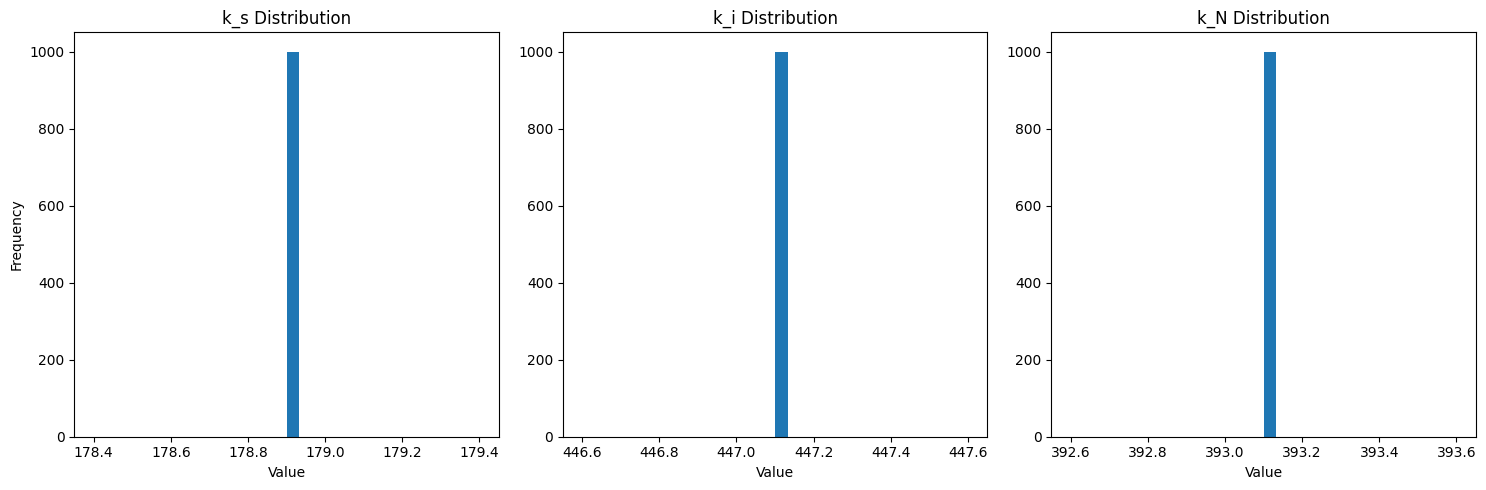

In [3]:

# Create multiple samples to visualize uncertainty
n_samples = 1000
k_s_samples = []
k_i_samples = []
k_N_samples = []

for _ in range(n_samples):
  env.reset()
  info = env.model.info()
  k_s_samples.append(info['parameters']['k_s'])
  k_i_samples.append(info['parameters']['k_i'])
  k_N_samples.append(info['parameters']['k_N'])

# Create subplots for each parameter
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.hist(k_s_samples, bins=30)
ax1.set_title('k_s Distribution')
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')

ax2.hist(k_i_samples, bins=30)
ax2.set_title('k_i Distribution')
ax2.set_xlabel('Value')

ax3.hist(k_N_samples, bins=30)
ax3.set_title('k_N Distribution')
ax3.set_xlabel('Value')

plt.tight_layout()
